In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = tf.keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

13568290/13568290 [==============================] - 1s 0us/step


In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df['Date Time']=pd.to_datetime(df['Date Time'])

In [5]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [6]:
df.set_index(df['Date Time'],drop=True,inplace=True)

In [7]:
df.drop('Date Time',axis=1,inplace=True)

In [8]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [9]:
df.shape

(420551, 14)

In [10]:
temp=df['T (degC)']
df.drop('T (degC)',axis=1,inplace=True)

In [11]:
df.insert(0,'T (degC)',temp)

In [12]:
df.head()

,T (degC),p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,-8.02,996.52,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,-8.41,996.57,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,-8.51,996.53,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,-8.31,996.51,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,-8.27,996.51,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [13]:
df_new=df[0:len(df):6]

In [14]:
df_new.head()

,T (degC),p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,-8.02,996.52,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 01:10:00,-7.62,996.50,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 02:10:00,-8.85,996.63,264.57,-9.70,93.5,3.12,2.92,0.20,1.82,2.93,1312.11,0.16,0.50,158.3
2009-01-01 03:10:00,-8.84,996.87,264.56,-9.69,93.5,3.13,2.92,0.20,1.83,2.93,1312.37,0.07,0.25,129.3
2009-01-01 04:10:00,-9.23,997.05,264.15,-10.25,92.2,3.03,2.79,0.24,1.74,2.80,1314.62,0.10,0.38,203.9


In [15]:
df_new.tail()

,T (degC),p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2016-12-31 19:20:00,-1.40,1002.08,271.59,-6.10,70.20,5.51,3.87,1.64,2.40,3.86,1282.68,1.08,1.68,207.5
2016-12-31 20:20:00,-2.15,1001.42,270.90,-7.08,68.77,5.21,3.59,1.63,2.23,3.58,1285.50,0.79,1.24,184.3
2016-12-31 21:20:00,-2.61,1001.05,270.47,-6.97,71.80,5.04,3.62,1.42,2.25,3.61,1287.20,0.77,1.64,129.1
2016-12-31 22:20:00,-3.22,1000.51,269.90,-7.63,71.40,4.81,3.44,1.38,2.14,3.44,1289.50,0.85,1.54,207.8
2016-12-31 23:20:00,-4.05,1000.07,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0


In [16]:
df_new.shape

(70092, 14)

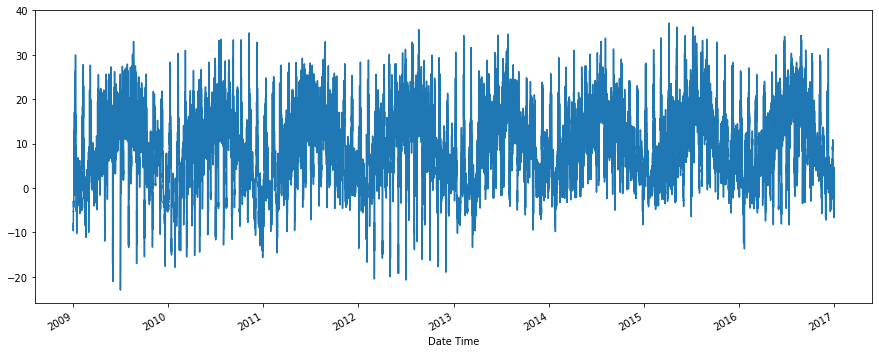

In [17]:
df_new['T (degC)'].plot(figsize=(15,6))

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df_new)

In [20]:
df_scaled

array([[0.24925175, 0.81458786, 0.24478994, ..., 0.99726153, 0.99802107,
        0.42305556],
       [0.25590289, 0.8143902 , 0.25157129, ..., 0.99717676, 0.9979093 ,
        0.4625    ],
       [0.23545062, 0.81567503, 0.23106186, ..., 0.99717477, 0.99789633,
        0.43972222],
       ...,
       [0.33920851, 0.85935956, 0.32864704, ..., 0.9972356 , 0.9980101 ,
        0.35861111],
       [0.32906551, 0.85402253, 0.31921932, ..., 0.99724358, 0.99800012,
        0.57722222],
       [0.31526438, 0.84967385, 0.30598743, ..., 0.99722563, 0.99799812,
        0.66666667]])

In [21]:
training_size=int(len(df_scaled)*0.65)
test_size=len(df_scaled)-training_size

In [22]:
training_size,test_size

(45559, 24533)

In [23]:
train_data=df_scaled[:training_size,]
test_data=df_scaled[training_size:len(df_scaled),]

In [24]:
train_data.shape,test_data.shape

((45559, 14), (24533, 14))

In [25]:
def create_dataset(dataset,timestep=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:i+timestep,1:]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX),np.array(dataY)

In [26]:
timestep=168
X_train,y_train=create_dataset(train_data,timestep)
X_test,y_test=create_dataset(test_data,timestep)

In [27]:
X_train.shape,y_train.shape

((45390, 168, 13), (45390,))

In [28]:
X_test.shape,y_test.shape

((24364, 168, 13), (24364,))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten

In [30]:
model=Sequential()
model.add(Conv1D(64,kernel_size=2,input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu'))
model.add(Conv1D(32,kernel_size=3,activation='relu'))
model.add(Conv1D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
# model.add(Dense(8,activation='relu'))
# model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 167, 64)           1728      
                                                                 
 conv1d_1 (Conv1D)           (None, 165, 32)           6176      
                                                                 
 conv1d_2 (Conv1D)           (None, 163, 32)           3104      
                                                                 
 flatten (Flatten)           (None, 5216)              0         
                                                                 
 dense (Dense)               (None, 8)                 41736     
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 52,753
Trainable params: 52,753
Non-traina

In [32]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [33]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32,callbacks=early_stopping)

Epoch 1/100
1419/1419 [==============================] - 6s 4ms/step - loss: 1.8314e-04 - val_loss: 2.0661e-04
Epoch 2/100
1419/1419 [==============================] - 5s 4ms/step - loss: 1.7028e-04 - val_loss: 1.5009e-04
Epoch 3/100
1419/1419 [==============================] - 6s 4ms/step - loss: 1.7560e-04 - val_loss: 1.9088e-04
Epoch 4/100
1419/1419 [==============================] - 6s 4ms/step - loss: 1.7021e-04 - val_loss: 2.0022e-04
Epoch 5/100
1419/1419 [==============================] - 6s 4ms/step - loss: 1.7369e-04 - val_loss: 1.5630e-04
Epoch 6/100
1419/1419 [==============================] - 6s 4ms/step - loss: 1.6901e-04 - val_loss: 1.5990e-04
Epoch 7/100
1419/1419 [==============================] - 6s 4ms/step - loss: 1.7354e-04 - val_loss: 1.4818e-04
Epoch 8/100
1419/1419 [==============================] - 6s 4ms/step - loss: 1.7214e-04 - val_loss: 1.4634e-04
Epoch 9/100
1419/1419 [==============================] - 6s 4ms/step - loss: 1.6889e-04 - val_loss: 1.4498e-04
E

In [ ]:
model.save('weather_cnn_model.hdf5')

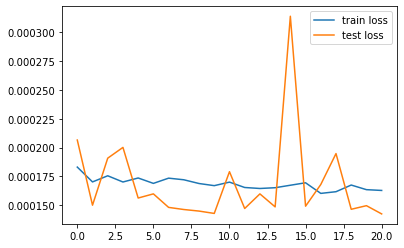

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.legend()

In [34]:
from tensorflow.keras.models import load_model

In [35]:
model=load_model('weather_cnn_model.hdf5')

In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

762/762 [==============================] - 2s 2ms/step


In [37]:
train_predict

array([[0.21496156],
       [0.21774152],
       [0.19810359],
       ...,
       [0.39048326],
       [0.37539646],
       [0.36276406]], dtype=float32)

In [38]:
train_predict_repeated=np.repeat(train_predict,14,axis=-1)
test_predict_repeated=np.repeat(test_predict,14,axis=-1)

In [39]:
train_predict_repeated

array([[0.21496156, 0.21496156, 0.21496156, ..., 0.21496156, 0.21496156,
        0.21496156],
       [0.21774152, 0.21774152, 0.21774152, ..., 0.21774152, 0.21774152,
        0.21774152],
       [0.19810359, 0.19810359, 0.19810359, ..., 0.19810359, 0.19810359,
        0.19810359],
       ...,
       [0.39048326, 0.39048326, 0.39048326, ..., 0.39048326, 0.39048326,
        0.39048326],
       [0.37539646, 0.37539646, 0.37539646, ..., 0.37539646, 0.37539646,
        0.37539646],
       [0.36276406, 0.36276406, 0.36276406, ..., 0.36276406, 0.36276406,
        0.36276406]], dtype=float32)

In [40]:
train_predict_transformed=scaler.inverse_transform(train_predict_repeated)[:,0]
test_predict_transformed=scaler.inverse_transform(test_predict_repeated)[:,0]

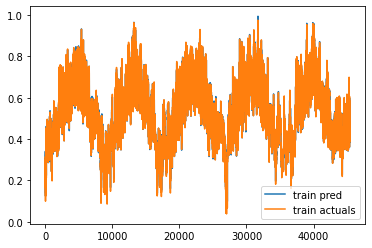

In [43]:
plt.plot(train_predict,label='train pred')
plt.plot(y_train,label='train actuals')
plt.legend()

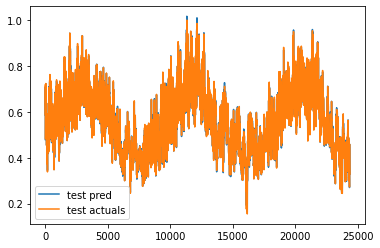

In [44]:
plt.plot(test_predict,label='test pred')
plt.plot(y_test,label='test actuals')
plt.legend()

In [111]:

past_data=[]

In [112]:
#we will take last 1 month record 
past_data.append(df_scaled[:168,1:])

In [113]:
past_data=np.array(past_data)

In [114]:
past_data.shape

(1, 168, 13)

In [74]:
forecasted_temp=model.predict(past_data)

1/1 [==============================] - 0s 136ms/step


In [75]:
forecasted_temp

array([[0.21496156]], dtype=float32)

In [152]:
forecasted_temp_repeated=np.repeat(forecasted_temp,14,axis=-1)

In [153]:
forecasted_temp_transformed=scaler.inverse_transform(forecasted_temp_repeated)[:,0]

In [154]:
forecasted_temp_transformed

array([-10.0822115], dtype=float32)

In [168]:
temperature=df_new['T (degC)']

In [169]:
temperature

Date Time
2009-01-01 00:10:00   -8.02
2009-01-01 01:10:00   -7.62
2009-01-01 02:10:00   -8.85
2009-01-01 03:10:00   -8.84
2009-01-01 04:10:00   -9.23
                       ... 
2016-12-31 19:20:00   -1.40
2016-12-31 20:20:00   -2.15
2016-12-31 21:20:00   -2.61
2016-12-31 22:20:00   -3.22
2016-12-31 23:20:00   -4.05
Name: T (degC), Length: 70092, dtype: float64

In [170]:
temperature=np.append(temperature,forecasted_temp_transformed)

In [171]:
temperature

array([ -8.02      ,  -7.62      ,  -8.85      , ...,  -3.22      ,
        -4.05      , -10.08221149])

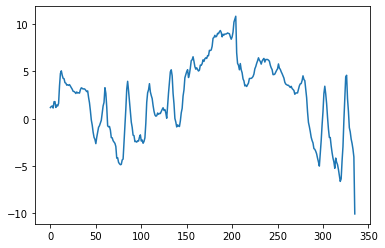

In [172]:
plt.plot(temperature[len(temperature)-336:len(temperature)])

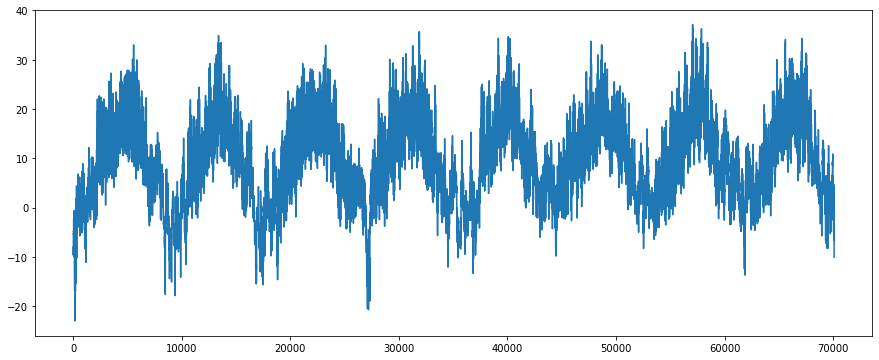

In [175]:
plt.figure(figsize=(15,6))
plt.plot(temperature)

In [ ]:
\